# Test Notebook

This notebook is just for illustrating how all the implemented logics work and for testing their usage\
However, the complete application has been tested with the data in the json and csv files.

In [115]:
import numpy as np
import matplotlib.pyplot as plt

## Intercept Logic

In [116]:
m = 0.2875
c = 1.21

z = 10
n = 10

In [117]:
line_from_x = lambda x: m * x + c
line_from_y = lambda y: (y - c)/m 

x = np.linspace(0, z, n, endpoint=False)
k = z/n

In [118]:
X, Y = np.meshgrid(x, x)
Y_left = line_from_x(X)
Y_right = line_from_x(X+k)
X_down = line_from_y(Y)
X_up = line_from_y(Y+k)

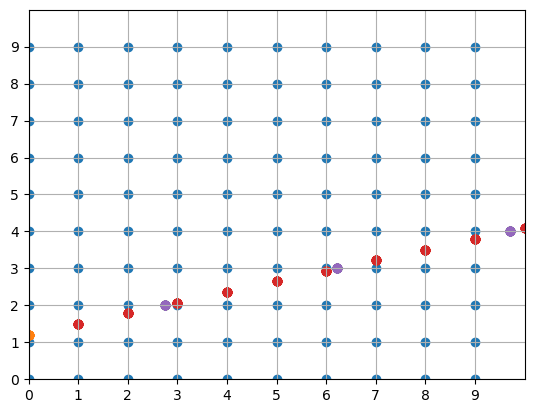

In [119]:
plt.scatter(X, Y)
plt.scatter(X, Y_left)
plt.scatter(X_down, Y)
plt.scatter(X+k, Y_right)
plt.scatter(X_up, Y+k)

plt.xlim([0, z])
plt.ylim([0, z])

plt.xticks(np.arange(0, z, k))
plt.yticks(np.arange(0, z, k))

plt.grid(visible=True);

In [120]:
Il = np.dstack([np.where(np.logical_and(Y <= Y_left, Y_left < Y+k), X, 0), 
                np.where(np.logical_and(Y <= Y_left, Y_left < Y+k), Y_left, 0)])

In [121]:
Ir = np.dstack([np.where(np.logical_and(Y <= Y_right, Y_right < Y + k), X+k, 0),
                np.where(np.logical_and(Y <= Y_right, Y_right < Y + k), Y_right, 0)])

In [122]:
Id = np.dstack([np.where(np.logical_and(X <= X_down, X_down < X + k), X_down, 0),
                np.where(np.logical_and(X <= X_down, X_down < X + k), Y, 0)])

In [123]:
Iu = np.dstack([np.where(np.logical_and(X <= X_up, X_up < X + k), X_up, 0),
                np.where(np.logical_and(X <= X_up, X_up < X + k), Y+1, 0)])

In [124]:
I = np.abs(np.abs(Il - Ir) - np.abs(Id - Iu))

In [125]:
intercept_matrix = np.apply_along_axis(lambda xy: np.sqrt(xy[0]**2 + xy[1]**2), 2, I)

In [126]:
intercept_matrix

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [1.04050769, 1.04050769, 0.77811879, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.2623889 , 1.04050769, 1.04050769,
        1.04050769, 0.23524522, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.80526247, 1.04050769, 1.04050769, 0.73287933],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.30762836],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

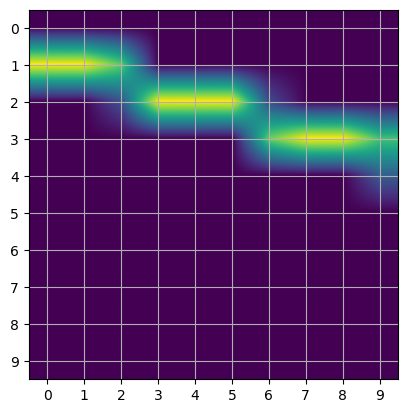

In [127]:
plt.imshow(intercept_matrix, interpolation='bilinear')

plt.xticks(np.arange(0, z, k))
plt.yticks(np.arange(0, z, k))

plt.grid(True);

In [128]:
intercept_matrix.flatten()

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.04050769, 1.04050769, 0.77811879, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.2623889 , 1.04050769, 1.04050769,
       1.04050769, 0.23524522, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.80526247, 1.04050769, 1.04050769, 0.73287933,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.30762836,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [129]:
mat_restored = intercept_matrix.reshape(10,10)

In [130]:
mat_restored

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [1.04050769, 1.04050769, 0.77811879, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.2623889 , 1.04050769, 1.04050769,
        1.04050769, 0.23524522, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.80526247, 1.04050769, 1.04050769, 0.73287933],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.30762836],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

## Line generating logic

In [131]:
n = 4
r = 3
phi = 2 * np.pi/ r
x = 10
theta = 0.05
z = 5

In [132]:
phis = (np.arange(r) * phi).reshape(-1, 1)
thetas = np.arange(-n + 1, n, 2) * theta / 2   if n % 2 == 0 else     np.arange(-(n // 2), n // 2 + 1) * theta
thetas = thetas.reshape(-1, 1)

In [133]:
thetas.shape

(4, 1)

In [134]:

# distances from the centre of the object
distances_from_center = x * np.sin(thetas)

# beta is slope of line (angle from +ve x-axis)
# generate all possible values of beta for different combinations of theta and phi
betas = (np.pi / 2 - thetas) + phis.T

In [135]:
distances_from_center

array([[-0.74929707],
       [-0.24997396],
       [ 0.24997396],
       [ 0.74929707]])

In [136]:
betas

array([[1.64579633, 3.74019143, 5.83458653],
       [1.59579633, 3.69019143, 5.78458653],
       [1.54579633, 3.64019143, 5.73458653],
       [1.49579633, 3.59019143, 5.68458653]])

In [137]:
# changing origin
distances_from_bottom_left = (1 - 1 / np.tan(betas)) * (z / 2) + distances_from_center/np.sin(betas)

In [138]:
distances_from_bottom_left

array([[ 1.93644293,  0.16450413,  9.42163463],
       [ 2.31246093, -1.1111115 ,  7.61424363],
       [ 2.68753907, -2.61424363,  6.1111115 ],
       [ 3.06355707, -4.42163463,  4.83549587]])

In [139]:
# merge distance and angle into a couple of parameters
line_params_array = np.dstack([distances_from_bottom_left, betas]).reshape(-1, 2)
line_params_array

array([[ 1.93644293,  1.64579633],
       [ 0.16450413,  3.74019143],
       [ 9.42163463,  5.83458653],
       [ 2.31246093,  1.59579633],
       [-1.1111115 ,  3.69019143],
       [ 7.61424363,  5.78458653],
       [ 2.68753907,  1.54579633],
       [-2.61424363,  3.64019143],
       [ 6.1111115 ,  5.73458653],
       [ 3.06355707,  1.49579633],
       [-4.42163463,  3.59019143],
       [ 4.83549587,  5.68458653]])

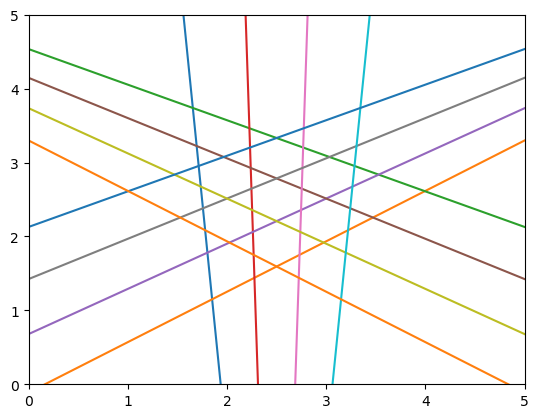

In [140]:
xp = np.linspace(0, z)
for i, line in enumerate(line_params_array):
    yp = np.tan(line[1]) * (xp - line[0])
    plt.plot(xp, yp, label=i)
    
plt.xlim([0, z])
plt.ylim([0, z]);
# plt.legend()

## Gauss Elimination

In [245]:
A = np.array([[1,2,3,5],[2,4,8,12],[3,6,7,13]])
b = np.array([0,6,-6]).reshape(-1,1)
b

array([[ 0],
       [ 6],
       [-6]])

In [246]:
m = b.shape[0]

# augmenting A matrix with b
aug_matrix = np.hstack([A, b]).astype('float64')
# aug_matrix = aug_matrix.astype('float64')

In [247]:
m, n = A.shape
x_p = np.zeros([n, 1])
X_n = np.zeros([n, 0])
free_col = np.empty([m, 0])
pivot_list = []
k=-1
for i in range(m):
    # partial pivoting
    max_row = i + np.argmax(np.abs(aug_matrix[i:, k]))
    aug_matrix[[i, max_row]] = aug_matrix[[max_row, i]]
    
    k += 1
    pivot = aug_matrix[i, k]
    
    while pivot==0 and k<n:
        id_col = np.zeros([n, 1])
        id_col[k, 0] = 1
        X_n = np.hstack([X_n, id_col])
        
        free_col = np.hstack([free_col, -aug_matrix[:, k].reshape(-1, 1)])  
        k += 1
        # if this row has no pivot (first 0 row)
        if k == n:
            break
        pivot = aug_matrix[i, k]
        
    if k<n:
        display(aug_matrix)
        aug_matrix[i, :] /= pivot
        
        for j in range(0, m):
            if j==i: continue
            factor = aug_matrix[j, k]
            aug_matrix[j, :] -= factor * aug_matrix[i, :]
            
        pivot_list.append([i, k])   
        
    else:
        rank = i
        break
else:
    rank = m
    

array([[ 2.,  4.,  8., 12.,  6.],
       [ 1.,  2.,  3.,  5.,  0.],
       [ 3.,  6.,  7., 13., -6.]])

array([[  1.,   2.,   4.,   6.,   3.],
       [  0.,   0.,  -1.,  -1.,  -3.],
       [  0.,   0.,  -5.,  -5., -15.]])

In [248]:
aug_matrix, rank, pivot_list, k

(array([[ 1.,  2.,  0.,  2., -9.],
        [-0., -0.,  1.,  1.,  3.],
        [ 0.,  0.,  0.,  0.,  0.]]),
 2,
 [[0, 0], [1, 2]],
 4)

In [249]:
for j in range(k+1, n):
    free_col = np.hstack([free_col, -aug_matrix[:, j].reshape(-1, 1)])
    id_col = np.zeros([n, 1])
    id_col[j, 0] = 1
    X_n = np.hstack([X_n, id_col])
    
if aug_matrix[rank:, n].any(): 
    print('inconsistent system!!')

In [250]:
k, free_col, X_n

(4,
 array([[-2., -2.],
        [-0., -1.],
        [-0., -0.]]),
 array([[0., 0.],
        [1., 0.],
        [0., 0.],
        [0., 1.]]))

In [251]:
ctr=0
for i, k in pivot_list:
    x_p[k, 0] = aug_matrix[i, n] 
    X_n[k, :] = free_col[ctr, :]
    ctr+=1
    
x_p, X_n

(array([[-9.],
        [ 0.],
        [ 3.],
        [ 0.]]),
 array([[-2., -2.],
        [ 1.,  0.],
        [-0., -1.],
        [ 0.,  1.]]))

In [252]:
x_soln = x_p + X_n[:, 0].reshape(-1, 1)
x_soln

array([[-11.],
       [  1.],
       [  3.],
       [  0.]])